In [6]:
# %%writefile neural_network

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as pt


In [23]:
class Network:
    def __init__(self):
        self.data_dim=[None,2]
        self.labels_dim=[None,1]
        self.W_dim=[2,1]
        self.x_placehold=tf.placeholder(tf.float32,shape=self.data_dim)
        self.y_placehold=tf.placeholder(tf.float32,shape=self.labels_dim)
        self.W=tf.Variable(tf.random_uniform(self.W_dim,-1,1))
        self.b=tf.Variable([0.]) 
        self.sess = tf.Session()
    
    def moon(self,r, w, n, d, show):
        inner_rad = r - w / 2
        rho = np.ones(n) * inner_rad + np.random.rand(n) * w
        theta = np.random.rand(n) * np.pi
        X = rho * np.array([np.cos(theta), np.sin(theta)])
        Y = np.ones(n)

        x = rho * np.array([np.cos(theta), -np.sin(theta)]) + \
            (np.ones(X.shape).T * np.array([inner_rad, -d])).T
        y = -np.ones(n)

        if show:
            fig = pt.figure()
            ax = fig.gca()
            ax.set_aspect('equal')
            pt.scatter(X[0, :], X[1, :], marker='+')
            pt.scatter(x[0, :], x[1, :], marker='+')
            pt.show()

        return np.concatenate((X.T, x.T)), np.concatenate((Y.T, y.T))
    
    
    def linear(self):
        pos=np.arange(-1.,1.,0.01)
        data_len=len(pos)
        delta = np.random.uniform(0.1,1,data_len)
        y_positive=-(pos+1) + delta
        y_negative=-(pos+1) - delta
        
        Y=pos+y_positive+1
        y=pos+y_negative+1
        
        X=np.array([pos,y_positive])
        x=np.array([pos,y_negative])
        
        fig = pt.figure()
        ax = fig.gca()
        ax.set_aspect('equal')
        pt.scatter(X[0, :], X[1, :], marker='+')
        pt.scatter(x[0, :], x[1, :], marker='+')
        pt.show()
        
        return np.concatenate((X.T, x.T)), np.concatenate((Y.T, y.T))
        
    
    def input(self):
#         self.data, self.labels = self.moon(10, 6, 3000, 2, True)
        self.data, self.labels = self.linear()
        if len(self.labels.shape)==1:
            self.labels.shape=(-1,1)        
        
        
    def inference(self):
#         self.logits = tf.sign(tf.matmul(self.x_placehold, self.W) + self.b)
        self.logits = tf.matmul(self.x_placehold, self.W) + self.b
        
    
    def loss(self):
        self.loss_op=tf.reduce_sum(tf.square(self.logits - self.y_placehold))
        
    
    def train(self,learning_rate):
        optimizer = tf.train.GradientDescentOptimizer(learning_rate)
        self.train_op = optimizer.minimize(self.loss_op)
   
    
    def fit(self,count):
        self.sess = tf.Session()
        self.sess.run(tf.global_variables_initializer())
        wc, bc = self.sess.run([self.W, self.b], feed_dict={self.x_placehold: self.data, self.y_placehold: self.labels})
        print(wc,bc)
        
        for i in range(count):
            self.sess.run(self.train_op, feed_dict={self.x_placehold: self.data, self.y_placehold: self.labels})
        
        wc, bc = self.sess.run([self.W, self.b], feed_dict={self.x_placehold: self.data, self.y_placehold: self.labels})
        print(wc,bc)
        
        
    
    def evaluation(self):
        return self.sess.run(tf.reduce_sum(tf.abs(tf.sub(self.logits, self.labels))),feed_dict={self.x_placehold: self.data, self.y_placehold: self.labels})
    
        
    

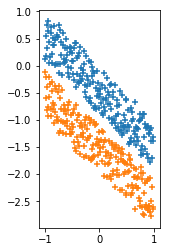

[[-0.5005548 ]
 [ 0.46485424]] [ 0.]
[[ 0.99999982]
 [ 1.00000012]] [ 0.99999976]


In [27]:
network=Network()
network.input()
network.inference()
network.loss()
network.train(0.001)
network.fit(1000)

# network.linear()

In [4]:
network.evaluation()

11822.0